<a id="title_ID"></a>
# JWST Pipeline Validation Notebook: photom with MIRI Imager

<span style="color:red"> **Instruments Affected**</span>: MIRI, NIRCam, NIRISS, NIRSpec 

## Introduction

This test is designed to test the photom step in the calwebb_image2 pipeline. This notebook processes an image through the photom step of calwebb_image2 (calwebb_detector1 is optional) and examines the output image of the photom step. 

The documentation of the step describes it as follows:

The photom step applies flux (photometric) calibrations to a data product to convert the data from units of countrate to surface brightness. The calibration information is read from a photometric reference file. For imaging modes the PHOTOM reference file contains a table of exposure parameters that define various instrument configurations and the flux conversion data for each of those configurations. The table contains one row for each allowed combination of exposure parameters, such as detector and filter. The photom step searches the table for the row that matches the parameters of the science exposure and then loads the calibration information from that row of the table. The correction values are multiplied into the SCI and ERR arrays, and the square of the correction values are multiplied into the variance arrays.

The scalar conversion constant is copied to the header keyword PHOTMJSR, which gives the conversion from DN/s to megaJy/steradian that was applied to the data. The step also computes the equivalent conversion factor to units of microJy/square-arcsecond (or microjanskys) and stores it in the header keyword PHOTUJA2.

### Documentation

The pipeline documentation can be found here: https://jwst-pipeline.readthedocs.io/en/latest/

The pipeline code is available on GitHub: https://github.com/spacetelescope/jwst


## Test description


The steps of the test in this notebook are as follow:

1) Read in data.

2) Run input data through calwebb_detector1. (if not reading in a rate or rateints file)

3) Run output of calwebb_detector1 through the photom step in calwebb_image2.

4) Get photom reference file. 

5) Compare the flat field reference file with the rate/cal image ratio and check that the correct conversion factor was applied.

6) Check that the pixel area information has been attached and that PIXAR_SR, PIXAR_A2, and BUNIT keywords have been populated in the cal image.



Author: T. Temim

In [1]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory.
from tempfile import TemporaryDirectory
import os
data_dir = TemporaryDirectory()
os.chdir(data_dir.name)

In [2]:
import os
if 'CRDS_CACHE_TYPE' in os.environ:
    if os.environ['CRDS_CACHE_TYPE'] == 'local':
        os.environ['CRDS_PATH'] = os.path.join(os.environ['HOME'], 'crds', 'cache')
    elif os.path.isdir(os.environ['CRDS_CACHE_TYPE']):
        os.environ['CRDS_PATH'] = os.environ['CRDS_CACHE_TYPE']
print('CRDS cache location: {}'.format(os.environ['CRDS_PATH']))

CRDS cache location: /grp/crds/cache


### Set up import statements

In [3]:
import jwst
from jwst.pipeline import Detector1Pipeline, Image2Pipeline
from jwst.photom import PhotomStep
from jwst.datamodels import RampModel, ImageModel, MirImgPhotomModel, dqflags

from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy import table

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from ci_watson.artifactory_helpers import get_bigdata
import crds


### Print pipeline version number

In [4]:
jwst.__version__ 

'1.5.3'

### Read in data from artifactory

In [5]:
input_file = get_bigdata('jwst_validation_notebooks',
                     'validation_data',
                     'flat_field',
                     'flat_field_miri_test', 
                     'car007_seq1_MIRIMAGE_F770Wexp1_b771_rate.fits')

### Read in input image as JWST data model

In [6]:
from jwst import datamodels

im = ImageModel(input_file)

### Run input data through calwebb_detector1

In [7]:
# The data read in is an image file already processed through Detector1. This step should only be run 
#if we're starting with a ramp file.

#det1 = Detector1Pipeline()
#det1.save_results = True
#det1.run(im)

### Run output of calwebb_detector1 through calwebb_image2 (or just the Photom step)

In [8]:
#input_file = input_file.replace('rateint.fits', 'rate.fits)

In [9]:
im2 = PhotomStep()
im2.save_results = True
im2.run(im)

2022-07-07 07:38:47,942 - stpipe.PhotomStep - INFO - PhotomStep instance created.


2022-07-07 07:38:48,076 - stpipe.PhotomStep - INFO - Step PhotomStep running with args (<ImageModel(1024, 1032) from car007_seq1_MIRIMAGE_F770Wexp1_b771_rate.fits>,).


2022-07-07 07:38:48,078 - stpipe.PhotomStep - INFO - Step PhotomStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'inverse': False, 'source_type': None}


2022-07-07 07:38:48,574 - stpipe.PhotomStep - INFO - Using photom reference file: /grp/crds/cache/references/jwst/jwst_miri_photom_0073.fits


2022-07-07 07:38:48,576 - stpipe.PhotomStep - INFO - Using area reference file: /grp/crds/cache/references/jwst/jwst_miri_area_0004.fits


2022-07-07 07:38:48,628 - stpipe.PhotomStep - INFO - Using instrument: MIRI


2022-07-07 07:38:48,629 - stpipe.PhotomStep - INFO -  detector: MIRIMAGE


2022-07-07 07:38:48,630 - stpipe.PhotomStep - INFO -  exp_type: MIR_IMAGE


2022-07-07 07:38:48,630 - stpipe.PhotomStep - INFO -  filter: F770W


2022-07-07 07:38:48,758 - stpipe.PhotomStep - INFO - Pixel area map copied to output.


2022-07-07 07:38:48,760 - stpipe.PhotomStep - INFO -  subarray: FULL


2022-07-07 07:38:48,761 - stpipe.PhotomStep - WARNING - Expected to find one matching row in table, found 0.


2022-07-07 07:38:48,762 - stpipe.PhotomStep - INFO - PHOTMJSR value: 0.592788


2022-07-07 07:38:48,796 - stpipe.PhotomStep - INFO - Results used CRDS context: jwst_0914.pmap


2022-07-07 07:38:48,881 - stpipe.PhotomStep - INFO - Saved model in car007_seq1_MIRIMAGE_F770Wexp1_b771_photomstep.fits


2022-07-07 07:38:48,882 - stpipe.PhotomStep - INFO - Step PhotomStep done


<ImageModel(1024, 1032) from car007_seq1_MIRIMAGE_F770Wexp1_b771_photomstep.fits>

In [10]:
#im2 = Image2Pipeline()
#im2.background.skip = True
#im2.assign_wcs.skip = True
#im2.flat_field.skip = True
#im2.photom.skip=False
#im2.resample.skip = True
#im2.save_results = True
#im2.run(im)

In [11]:
#input_file = input_file.replace('rate.fits', 'cal.fits')
input_file = input_file.replace('rate.fits', 'photomstep.fits')

In [12]:
# read in the calibrated file
im_cal = ImageModel(input_file)

### Calculate the cal/rate image ratio

The ratio of the photom processed file divided by the rate file should equal the conversion factor read from the reference file (comparison below). Look at the ratio file.

In [13]:
ratio_im = im_cal.data/im.data

print('min value of ratio image: ', np.nanmin(ratio_im))
print('max value of ratio image: ', np.nanmax(ratio_im))

min value of ratio image:  0.5927879
max value of ratio image:  0.59278804


In [14]:
print(ratio_im)

[[0.592788   0.592788   0.592788   ... 0.592788   0.592788   0.592788  ]
 [0.592788   0.592788   0.592788   ... 0.592788   0.592788   0.592788  ]
 [0.592788   0.59278804 0.592788   ... 0.592788   0.592788   0.592788  ]
 ...
 [0.592788   0.592788   0.592788   ... 0.592788   0.592788   0.5927879 ]
 [0.592788   0.592788   0.592788   ... 0.592788   0.592788   0.592788  ]
 [0.592788   0.592788   0.592788   ... 0.592788   0.592788   0.59278804]]


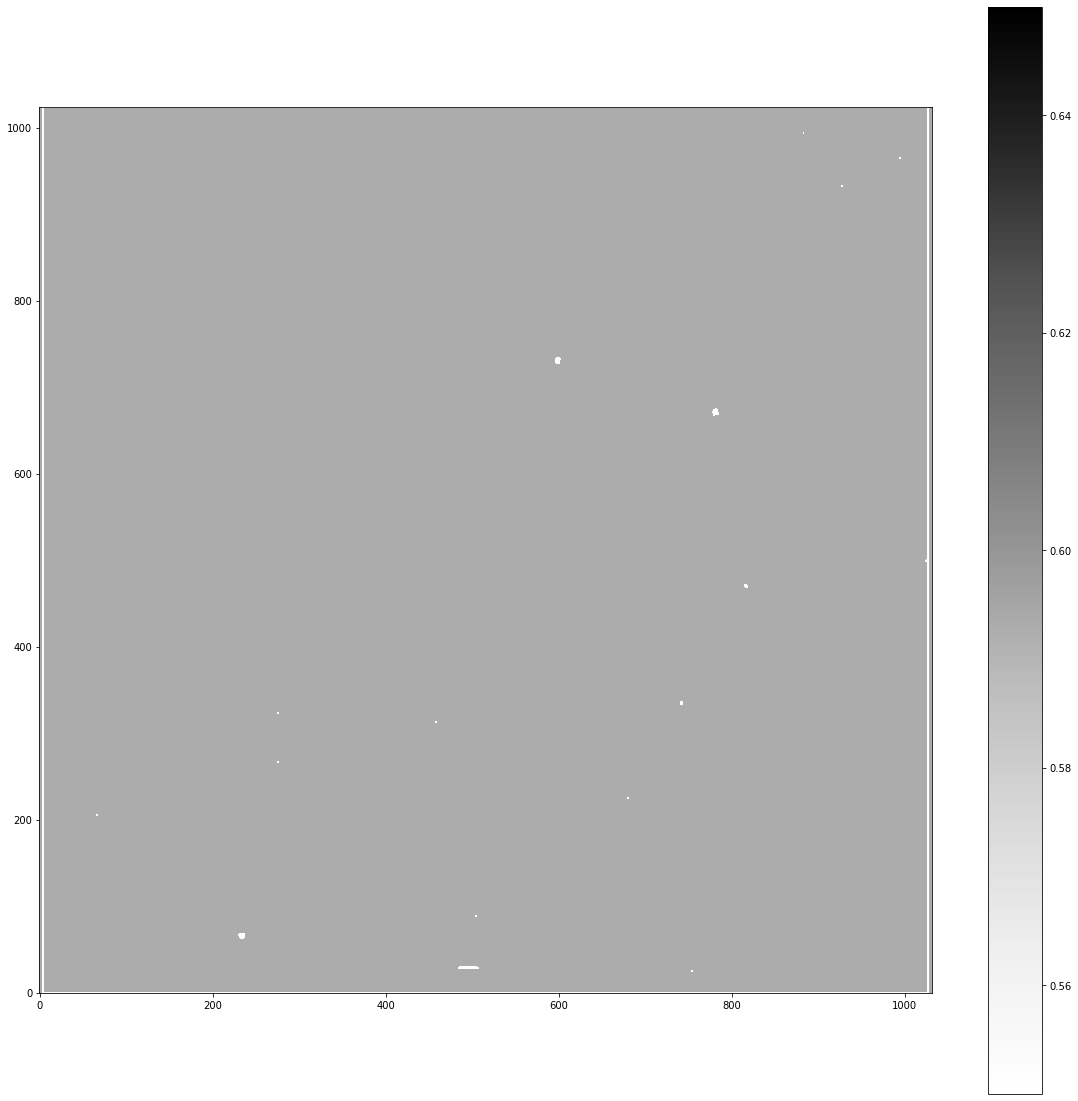

In [15]:
# Look at the ratio image
plt.figure(figsize=(20,20))

# mask out DO_NOT_USE values of 1
masked_ratio = np.ma.masked_where((im_cal.dq & dqflags.pixel['DO_NOT_USE'] > 0), ratio_im)

cmap = matplotlib.cm.get_cmap("Greys").copy()  # Can be any colormap that you want after the cm
cmap.set_bad(color='white') # color to mark all DO_NOT_USE pixels

plt.imshow(masked_ratio, cmap=cmap, origin='lower', vmin=0.55,vmax=0.65)
plt.colorbar()
plt.show()

### Get photom reference file

Look at the photom reference file being used and some parameters from the header.

In [16]:
photomreffile = im_cal.meta.ref_file.photom.name
print('Photom reference file', photomreffile)
# find location of file
basename = crds.core.config.pop_crds_uri(photomreffile)
path = crds.locate_file(basename, "jwst")
# open reference file

photom_file = MirImgPhotomModel(path)

Photom reference file crds://jwst_miri_photom_0073.fits


In [17]:
# Print the contents of the phot table

photom_file.phot_table


FITS_rec([('F560W', 'GENERIC', 1.12701 , 0.111122 ),
          ('F770W', 'GENERIC', 0.592788, 0.041936 ),
          ('F1000W', 'GENERIC', 0.849523, 0.0507364),
          ('F1130W', 'GENERIC', 2.54947 , 0.184871 ),
          ('F1280W', 'GENERIC', 0.996933, 0.0706994),
          ('F1500W', 'GENERIC', 0.882691, 0.0424939),
          ('F1800W', 'GENERIC', 1.24199 , 0.0965052),
          ('F2100W', 'GENERIC', 0.967241, 0.0627728),
          ('F2550W', 'GENERIC', 1.98242 , 0.170253 ),
          ('F2550WR', 'GENERIC', 2.05569 , 0.101309 ),
          ('F1065C', 'GENERIC', 5.91792 , 0.436445 ),
          ('F1140C', 'GENERIC', 6.19264 , 0.469597 ),
          ('F1550C', 'GENERIC', 7.80314 , 0.561941 ),
          ('F2300C', 'GENERIC', 1.65474 , 0.0993   )],
         dtype=(numpy.record, [('filter', 'S12'), ('subarray', 'S15'), ('photmjsr', '>f4'), ('uncertainty', '>f4')]))

Look at the value of the pixel area in steradians from the reference file

In [18]:
photom_file.meta.photometry.pixelarea_steradians

2.84403609523084e-13

Look at the value of the pixel area in arcseconds squared from the reference file

In [19]:
photom_file.meta.photometry.pixelarea_arcsecsq

0.0121

### Print photom calibration conversion factor for image

Look up the filter from the file header and the conversion factor from the table for that filter. Compare the value to that in the table printed above to be sure they match.

In [20]:
print('The filter for this data is:', im_cal.meta.instrument.filter)

conv_factor = photom_file.phot_table['photmjsr'][np.where(photom_file.phot_table['filter'] == im_cal.meta.instrument.filter)][0]
print(conv_factor)

#print(photom_file.phot_table['photmjsr'][np.where(photom_file.phot_table['filter'] == im_cal.meta.instrument.filter)][0])

The filter for this data is: F770W
0.592788


### Check that same value has been applied to cal image (three values should be the same)

The ratio image calculated previously should equal the value of the conversion factor from the table.

In [21]:
print('image min','image max','ref file')
print(np.nanmin(ratio_im),np.nanmax(ratio_im),conv_factor)

try: 
    np.testing.assert_allclose(np.nanmin(ratio_im), conv_factor, rtol = 0.01)
except AssertionError: 
    print("AssertionError: The minimum value is not within 1% of the conversion factor")

try: 
    np.testing.assert_allclose(np.nanmax(ratio_im), conv_factor, rtol = 0.01)
except AssertionError: 
    print("AssertionError: The maximum value is not within 1% of the conversion factor")    

image min image max ref file
0.5927879 0.59278804 0.592788


### Check that pixel area information has been attached

Check the extensions of the rate (input) and photom processed file to see if an AREA extension has been added.

In [22]:
# Look at extensions of the rate file 
uncal_filename = str(im.meta.filename)
hdu = fits.open(uncal_filename)
hdu.info()
hdu.close()

Filename: car007_seq1_MIRIMAGE_F770Wexp1_b771_rate.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   ()      
  1  SCI           1 ImageHDU        45   (1032, 1024)   float32   
  2  ERR           1 ImageHDU        10   (1032, 1024)   float32   
  3  DQ            1 ImageHDU        11   (1032, 1024)   int32 (rescales to uint32)   
  4  VAR_POISSON    1 ImageHDU         9   (1032, 1024)   float32   
  5  VAR_RNOISE    1 ImageHDU         9   (1032, 1024)   float32   
  6  ASDF          1 BinTableHDU     11   1R x 1C   [3590B]   


In [23]:
# Look at extensions of the rate file 
cal_filename = str(im_cal.meta.filename)
hdu = fits.open(cal_filename)
hdu.info()
hdu.close()

try:
    assert(im_cal.area.shape == im_cal.data.shape)
except AssertionError:
    print('AssertionError: AREA array is not the same shape as the data array')

Filename: car007_seq1_MIRIMAGE_F770Wexp1_b771_photomstep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     136   ()      
  1  SCI           1 ImageHDU        52   (1032, 1024)   float32   
  2  ERR           1 ImageHDU        10   (1032, 1024)   float32   
  3  DQ            1 ImageHDU        11   (1032, 1024)   int32 (rescales to uint32)   
  4  AREA          1 ImageHDU         9   (1032, 1024)   float32   
  5  VAR_POISSON    1 ImageHDU         9   (1032, 1024)   float32   
  6  VAR_RNOISE    1 ImageHDU         9   (1032, 1024)   float32   
  7  VAR_FLAT      1 ImageHDU         9   (1032, 1024)   float32   
  8  ASDF          1 BinTableHDU     11   1R x 1C   [4113B]   


#### Look at the pixel area extension that was attached

In [24]:
# Look at stats of pixel area image 

print('pix_area_min', 'pix_area_max','pix_area_mean')
print(np.nanmin(im_cal.area),np.nanmax(im_cal.area),np.nanmean(im_cal.area))

pix_area_min pix_area_max pix_area_mean
0.97582465 1.0159259 1.0058197


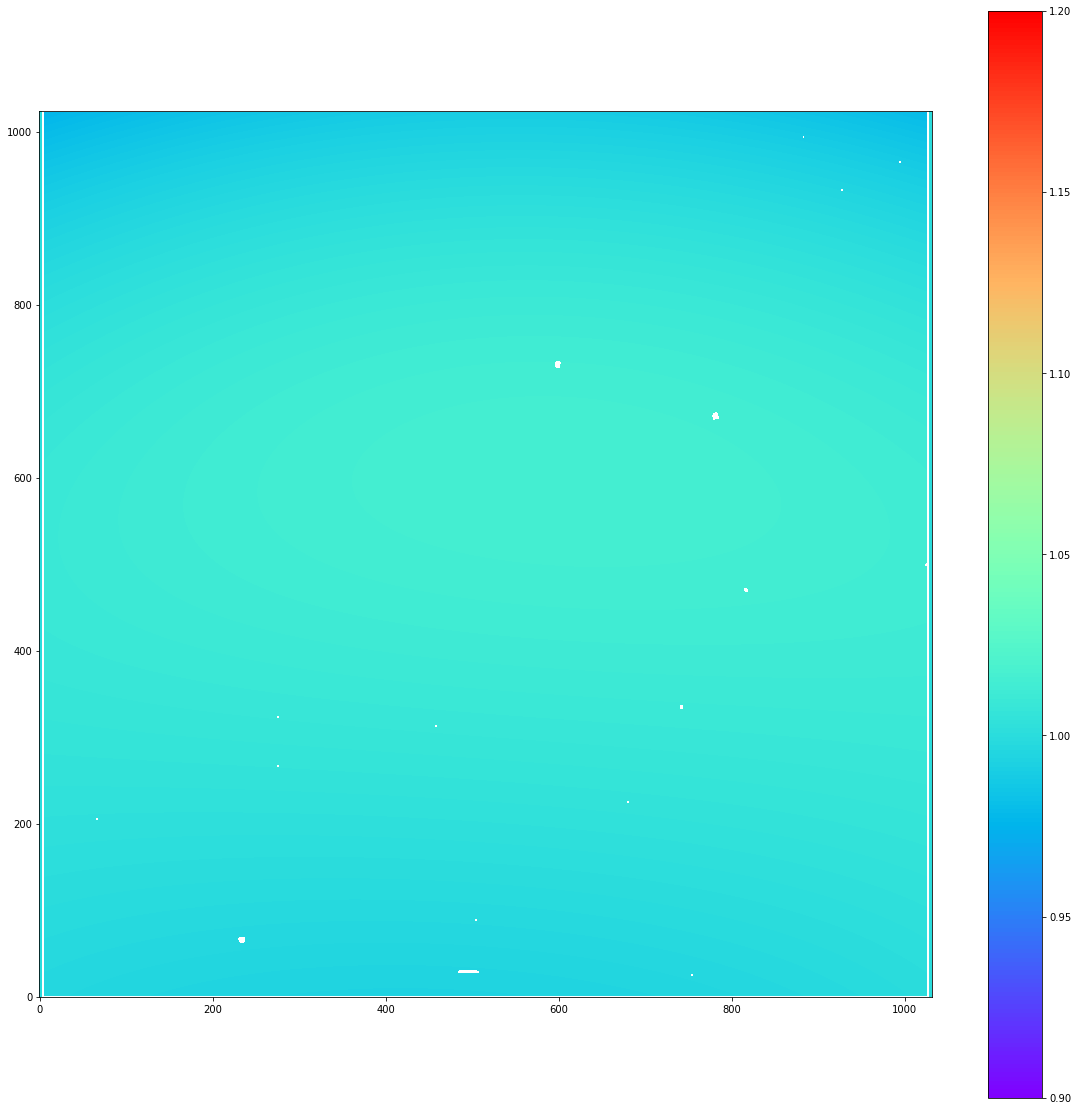

In [25]:
# Look at the area map image
plt.figure(figsize=(20,20))

# mask out DO_NOT_USE values of 1
masked_area = np.ma.masked_where((im_cal.dq & dqflags.pixel['DO_NOT_USE'] > 0), im_cal.area)

cmap = matplotlib.cm.get_cmap('rainbow').copy()  # Can be any colormap that you want after the cm
cmap.set_bad(color='white') # color to mark all DO_NOT_USE pixels

plt.imshow(masked_area, cmap=cmap, origin='lower', vmin=0.9,vmax=1.2)
plt.colorbar()
plt.show()

### Check that PIXAR_SR and PIXAR_A2 keywords have been populated

The header values PIXAR_SR and PIXAR_A2 values in the header of your output file should be populated and match the values from the photom reference file header.


In [26]:
im_cal.find_fits_keyword('PIXAR_SR')

['meta.photometry.pixelarea_steradians']

In [27]:
im_cal.find_fits_keyword('PIXAR_A2')

['meta.photometry.pixelarea_arcsecsq']

#### Check that the header value from the output file matches the one from the reference file (PIXAR_SR)

In [28]:
print(photom_file.meta.photometry.pixelarea_steradians,im_cal.meta.photometry.pixelarea_steradians)

try:
    assert photom_file.meta.photometry.pixelarea_steradians == im_cal.meta.photometry.pixelarea_steradians
except AssertionError:
    print('AssertionError: the header value PIXAR_SR in the output file header does not match the reference file.')

2.84403609523084e-13 2.84403609523084e-13


#### Check that the header value from the output file matches the one from the reference file (PIXAR_A2)

In [29]:
print(photom_file.meta.photometry.pixelarea_arcsecsq, im_cal.meta.photometry.pixelarea_arcsecsq)

try:
    assert photom_file.meta.photometry.pixelarea_arcsecsq == im_cal.meta.photometry.pixelarea_arcsecsq
except AssertionError:
    print('AssertionError: the header value PIXAR_A2 in the output file header does not match the reference file.')

0.0121 0.0121


### Verify that pixel area in steradians is consistent with the pixel area in arcseconds squared

1 steradian = 206265^2 arcsec^2, so the area in arcseconds squared * the unit conversion should equal the area in steradians.

In [30]:
print(im_cal.meta.photometry.pixelarea_arcsecsq/(206265.0**2),im_cal.meta.photometry.pixelarea_steradians)

converted_steradians = im_cal.meta.photometry.pixelarea_arcsecsq/(206265.0**2)


try:
     np.testing.assert_allclose(im_cal.meta.photometry.pixelarea_steradians, converted_steradians, rtol = 0.01)
except AssertionError:
    print('AssertionError: the two area units do not match.')

2.844030752201317e-13 2.84403609523084e-13


### Check that bunit information has been added to image ('MJy/sr')

Check that the units of the file have been updated to the correct ones, and that the numbers in the output file have changed to reflect the new units

In [31]:
print('The units of the rate file are: ', im.meta.bunit_data)
print('The units of the photom processed file are: ', im_cal.meta.bunit_data)

The units of the rate file are:  DN/s
The units of the photom processed file are:  MJy/sr


In [32]:
xval = 600
yval = 600

print('The value of the specified pixel in the rate file is: ', im.data[yval, xval])
print('The value of the specified pixel in the photom processed file is: ', im_cal.data[yval, xval])

print('The ratio between these values is: ', im_cal.data[yval, xval] / im.data[yval, xval])
print('The conversion factor from the table is: ', conv_factor)

try:
     np.testing.assert_allclose(im_cal.data[yval, xval] / im.data[yval, xval], conv_factor, rtol = 0.01)
except AssertionError:
    print('AssertionError: the science ratio does not match the conversion factor.')

The value of the specified pixel in the rate file is:  6.3175173
The value of the specified pixel in the photom processed file is:  3.7449484
The ratio between these values is:  0.592788
The conversion factor from the table is:  0.592788


### Check that the values of the ERR arrays also changed by the expected conversion factor

In [33]:
xval = 600
yval = 600

print('The value of the specified pixel in the rate file is: ', im.err[yval, xval])
print('The value of the specified pixel in the photom processed file is: ', im_cal.err[yval, xval])

print('The ratio between these values is: ', im_cal.err[yval, xval] / im.err[yval, xval])
print('The conversion factor from the table is: ', conv_factor)

try:
     np.testing.assert_allclose(im_cal.err[yval, xval] / im.err[yval, xval], conv_factor, rtol = 0.01)
except AssertionError:
    print('AssertionError: the error ratio does not match the conversion factor.')

The value of the specified pixel in the rate file is:  0.22237296
The value of the specified pixel in the photom processed file is:  0.13182002
The ratio between these values is:  0.592788
The conversion factor from the table is:  0.592788


## Success criteria

If there are no reported AssertionError messages and the images displayed look reasonable, this test passes.


## About this Notebook
**Author:** T. Temim and M. Cracraft, INS/MIRI
<br>**Updated On:** 05/13/2021 